# K Means Clustering

For simplicity I will use my made-up dataset for this clustering model.

### Loading Libraries and Dataset

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [15]:
# dataset about the Runners distance travel in a given time period
df = pd.read_csv('workout.csv')
df.head()

,distance,duration
0,3.0,15.0
1,2.0,10.0
2,3.0,14.0
3,1.1,13.0
4,3.1,15.0


### Standardizing the Attributes/Clustering variables

In [16]:
scaler = StandardScaler()
dfx = scaler.fit_transform(df)

### Determined the Number of Clusters
Using elbow method to determined the appropriate k value

Text(0, 0.5, 'inertia')

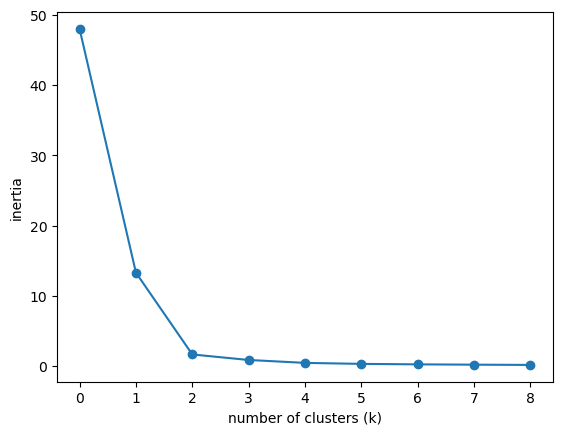

In [17]:
clusters = []
inertias = []

# try for 9 k
for k in range(1,10):
  km = KMeans(n_clusters=k, random_state=0)
  km.fit(dfx)
  
  # append clusters and inertias
  inertias.append(km.inertia_)
  clusters.append(km)
  
plt.plot(range(len(inertias)), inertias, '-o')
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')

The elbow of the curve start at around K=3. Values greater than 3k starts decaying steadily.

### Silhouette score 
The Silhouette score is used to measure the degree of separation between clusters.

In [18]:
for i in range(1,9,1): 
    print("---------------------------------------")
    print(clusters[i])
    print("Silhouette score:",silhouette_score(dfx, clusters[i].predict(dfx)))

---------------------------------------
KMeans(n_clusters=2, random_state=0)
Silhouette score: 0.6801797235765018
---------------------------------------
KMeans(n_clusters=3, random_state=0)
Silhouette score: 0.8351218705865467
---------------------------------------
KMeans(n_clusters=4, random_state=0)
Silhouette score: 0.7731312253479402
---------------------------------------
KMeans(n_clusters=5, random_state=0)
Silhouette score: 0.688104915054184
---------------------------------------
KMeans(n_clusters=6, random_state=0)
Silhouette score: 0.681491795677522
---------------------------------------
KMeans(n_clusters=7, random_state=0)
Silhouette score: 0.5528002466657721
---------------------------------------
KMeans(random_state=0)
Silhouette score: 0.49856889026365403
---------------------------------------
KMeans(n_clusters=9, random_state=0)
Silhouette score: 0.5189654084005247


As we can see from silhoutte and elbow method the optimal number of clusters is 3.

### Apply kmeans clustering with k = 3

In [19]:
# Kmeans object with 3 clusters
km = KMeans(n_clusters=3, random_state=0)

In [20]:
# fit and predict labels
y_km = km.fit_predict(dfx)
y_km

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2])

### Visualization

#### Cetroid of each clusters

In [21]:
centers = km.cluster_centers_
centers

array([[ 0.96159769, -0.26768834],
       [-1.32707578, -1.06309601],
       [ 0.36547809,  1.33078435]])

#### Assigning each feature in a variable

In [22]:
# Make a scatter plot of distance and duration and using labels to define the colors
distance = dfx[:,0]
duration = dfx[:,1]

Text(0, 0.5, 'Duration(minutes)')

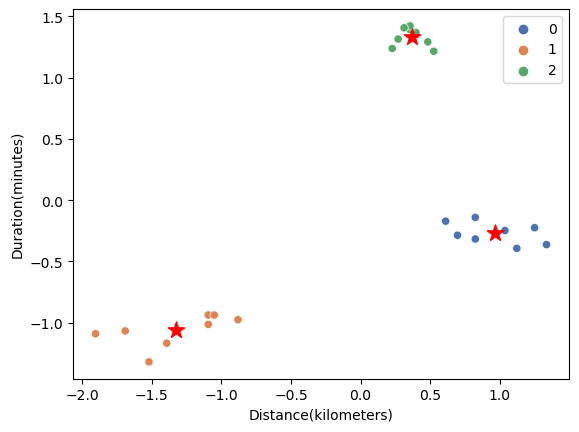

In [23]:
sns.scatterplot(distance, duration, hue=y_km, alpha=1, palette="deep")

# replacing centroid by accessing 2d list (centers)
plt.scatter(centers[0][0], centers[0][1], marker='*', color ='r', s=150)
plt.scatter(centers[1][0], centers[1][1], marker='*', color ='r', s=150)
plt.scatter(centers[2][0], centers[2][1], marker='*', color ='r', s=150)

plt.xlabel('Distance(kilometers)')
plt.ylabel('Duration(minutes)')

Note: our dataset has been standarized at this point

We can now labels each cluster like this;
- `team_orange` = lazy
- `team_green` = not so fast
- `team_blue` = fast

Just to recap, these are the pros and cons of using K-Means:

`pros`
- Easy to implement
- Only has one parameter to tune and you can easily see the direct impact of adjusting the value of   parameter K

`cons`
- Heavily affected by outliers
- Sensitive to random initialization

In [24]:
df['Label'] = y_km

In [25]:
df['Color'] = df['Label'].map({0:'Blue', 1:'Orange', 2:'Green'})

In [26]:
df

,distance,duration,Label,Color
0,3.0,15.0,1,Orange
1,2.0,10.0,1,Orange
2,3.0,14.0,1,Orange
3,1.1,13.0,1,Orange
4,3.1,15.0,1,Orange
5,2.3,12.0,1,Orange
6,3.5,14.5,1,Orange
7,1.6,13.3,1,Orange
8,7.0,25.0,0,Blue
9,8.0,24.0,0,Blue


-fin